In [1]:
import os 
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.cm as cm
import function_plot as f_plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
mock_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_varZ_v4.2eq_CB16MILES_ChFall/mock_ER_003/'
models_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_varZ_v4.2eq_CB16MILES_ChFall/'
phpars_to_fit=['mstar','mstar_form','agewr','agelgwr','agewm','agelgwm','agewmf','agelgwmf','zstarwr','zstarwm','zstarwmf','zstarlgwmf','zstarlgwr','zstarlgwm','Ag','Ai','mtoli','age10','age50','age90','dage_10_90', 'dage_25_75', 'dage_50_90', 'dage_10_50','dage_10_90n50']
n_par=np.size(phpars_to_fit)
n_mock=12500

In [3]:
file_pert=mock_dir+'sandage_varZ_v4.2eq_spec_dcomb0p25null_perterr_SNR100_001.fits'
file_models=models_dir+'sandage_varZ_v4.2eq.fits'
file_mock_dage1090n50=mock_dir+'mock_file_dage_10_90n50001.fits'
file_mock_dage1050n50=mock_dir+'mock_file_dage_10_50n50001.fits'
file_mock_dage5090n50=mock_dir+'mock_file_dage_50_90n50001.fits'
file_mock_age90=mock_dir+'mock_file_age90001.fits'
file_mock_age50=mock_dir+'mock_file_age50001.fits'
file_mock_Zr=mock_dir+'mock_file_zstarwr001.fits'
file_par=models_dir+'sandage_varZ_v4.2eq_spec_dcomb0p25null_001_physpar_wagef.fits'
file_idx=models_dir+'sandage_varZ_v4.2eq_spec_dcomb0p25null_idx_001.fits'


In [4]:
hdul_dage1090n50=fits.open(file_mock_dage1090n50)
hdul_dage1050n50=fits.open(file_mock_dage1050n50)
hdul_dage5090n50=fits.open(file_mock_dage5090n50)


hdul_idx=fits.open(file_idx)
hdul_par=fits.open(file_par)
hdul_age90=fits.open(file_mock_age90)
hdul_models=fits.open(file_models)
hdul_age50=fits.open(file_mock_age50)
hdul_Zr=fits.open(file_mock_Zr)

age10=hdul_par[1].data['age10'][0:n_mock]
age50=hdul_par[1].data['age50'][0:n_mock]
age90=hdul_par[1].data['age90'][0:n_mock]
age25=hdul_par[1].data['age25'][0:n_mock]
age75=hdul_par[1].data['age75'][0:n_mock]
Zr=hdul_par[1].data['LW_Z'][...,2]

N_burst=hdul_models[1].data['NBURST'][0:n_mock]
A_burst=hdul_models[1].data['ABURST'][0:n_mock]
Aburst_arr=np.reshape(A_burst, -1)


hdhg=hdul_idx[1].data['HdHg'][...,4] 
D4000n=hdul_idx[1].data['D4000n'][...,4]

In [5]:
np.shape(Zr)

(12500,)

In [6]:
np.size(hdul_par[1].data)

12500

In [7]:
age90_mock=hdul_age90[1].data['PARAM_MEDIAN']
age90_err=((hdul_age90[1].data['PARAM_P84'])-(hdul_age90[1].data['PARAM_P16']))/2.0

In [8]:
age50_mock=hdul_age50[1].data['PARAM_MEDIAN']
age50_err=((hdul_age50[1].data['PARAM_P84'])-(hdul_age50[1].data['PARAM_P16']))/2.0

In [9]:
Zr_mock=hdul_Zr[1].data['PARAM_MEDIAN']
Zr_err=((hdul_Zr[1].data['PARAM_P84'])-(hdul_Zr[1].data['PARAM_P16']))/2.0

In [10]:
dage1090n50=(age10-age90)/age50
dage1050n50=(age10-age50)/age50
dage5090n50=(age50-age90)/age50

dage1090n50_mock=hdul_dage1090n50[1].data['PARAM_MEDIAN']
dage1090n50_err=(np.log10(hdul_dage1090n50[1].data['PARAM_P84'])-np.log10(hdul_dage1090n50[1].data['PARAM_P16']))/2.0
dage1050n50_mock=hdul_dage1050n50[1].data['PARAM_MEDIAN']
dage1050n50_err=(np.log10(hdul_dage1050n50[1].data['PARAM_P84'])-np.log10(hdul_dage1050n50[1].data['PARAM_P16']))/2.0
dage5090n50_mock=hdul_dage5090n50[1].data['PARAM_MEDIAN']
dage5090n50_err=(np.log10(hdul_dage5090n50[1].data['PARAM_P84'])-np.log10(hdul_dage5090n50[1].data['PARAM_P16']))/2.0

<ipython-input-10-b85c26723fc8>:10: RuntimeWarning: divide by zero encountered in log10
  dage5090n50_err=(np.log10(hdul_dage5090n50[1].data['PARAM_P84'])-np.log10(hdul_dage5090n50[1].data['PARAM_P16']))/2.0
<ipython-input-10-b85c26723fc8>:10: RuntimeWarning: invalid value encountered in subtract
  dage5090n50_err=(np.log10(hdul_dage5090n50[1].data['PARAM_P84'])-np.log10(hdul_dage5090n50[1].data['PARAM_P16']))/2.0


total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:90: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


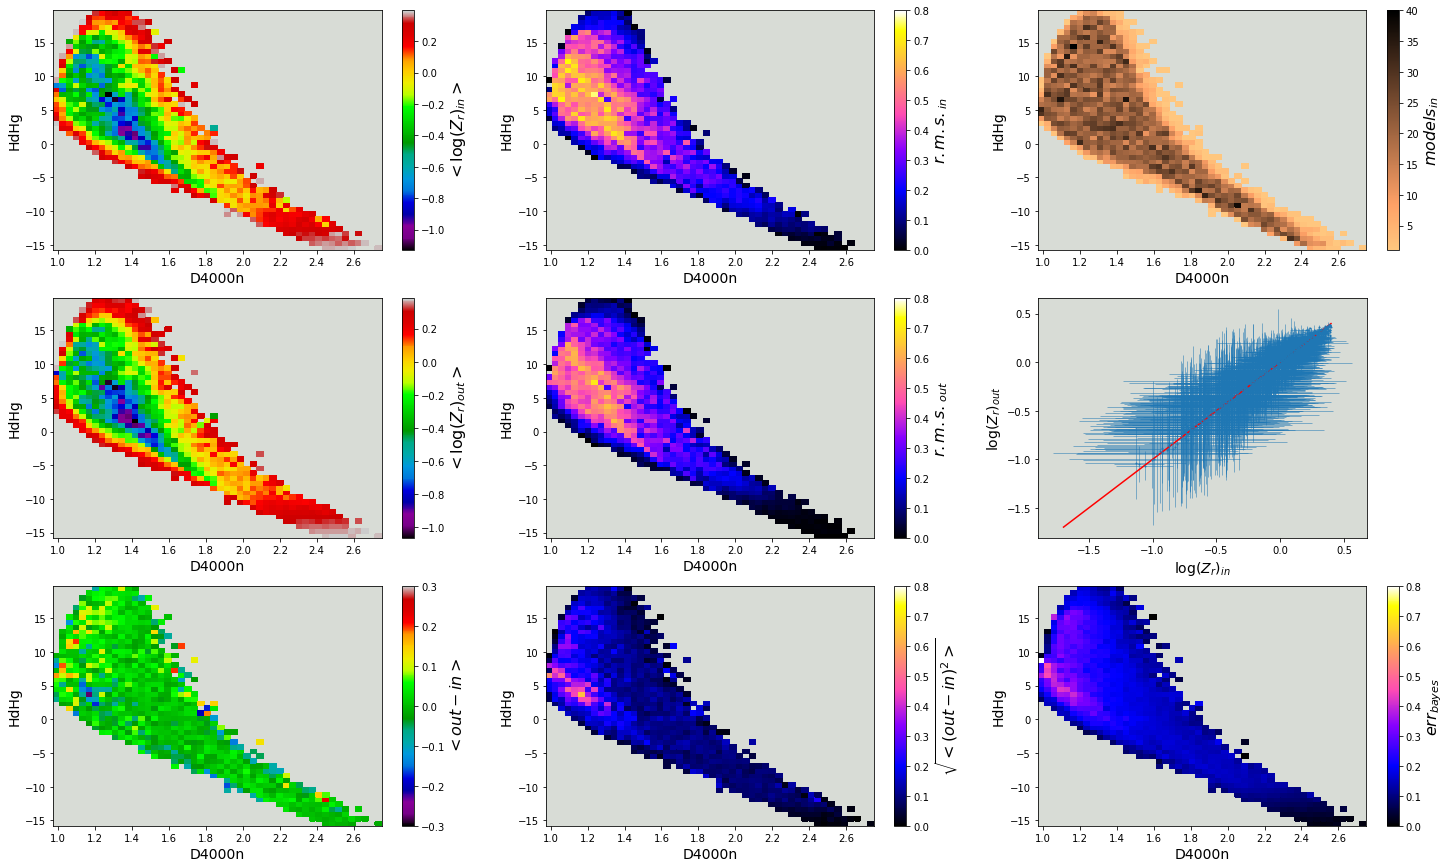

In [11]:
f_Zr=f_plt.density_map_5p(D4000n, hdhg, Zr, (Zr_mock), (Zr_err),par_name=r'$\log(Z_{r})$', x_label='D4000n', y_label='HdHg', vmin=[None,0.0, -0.3, 0.0,0.0], vmax=[None,0.8, 0.3, 0.8,0.8], figsize=(25,15), s=1)

In [12]:
#f_Zr.savefig('/home/edoardo/Desktop/mock_Zr_snr100.png')

In [13]:
age50_mock

array([9.536331, 9.076056, 9.273508, ..., 9.089777, 8.756586, 9.560114],
      dtype=float32)

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:90: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


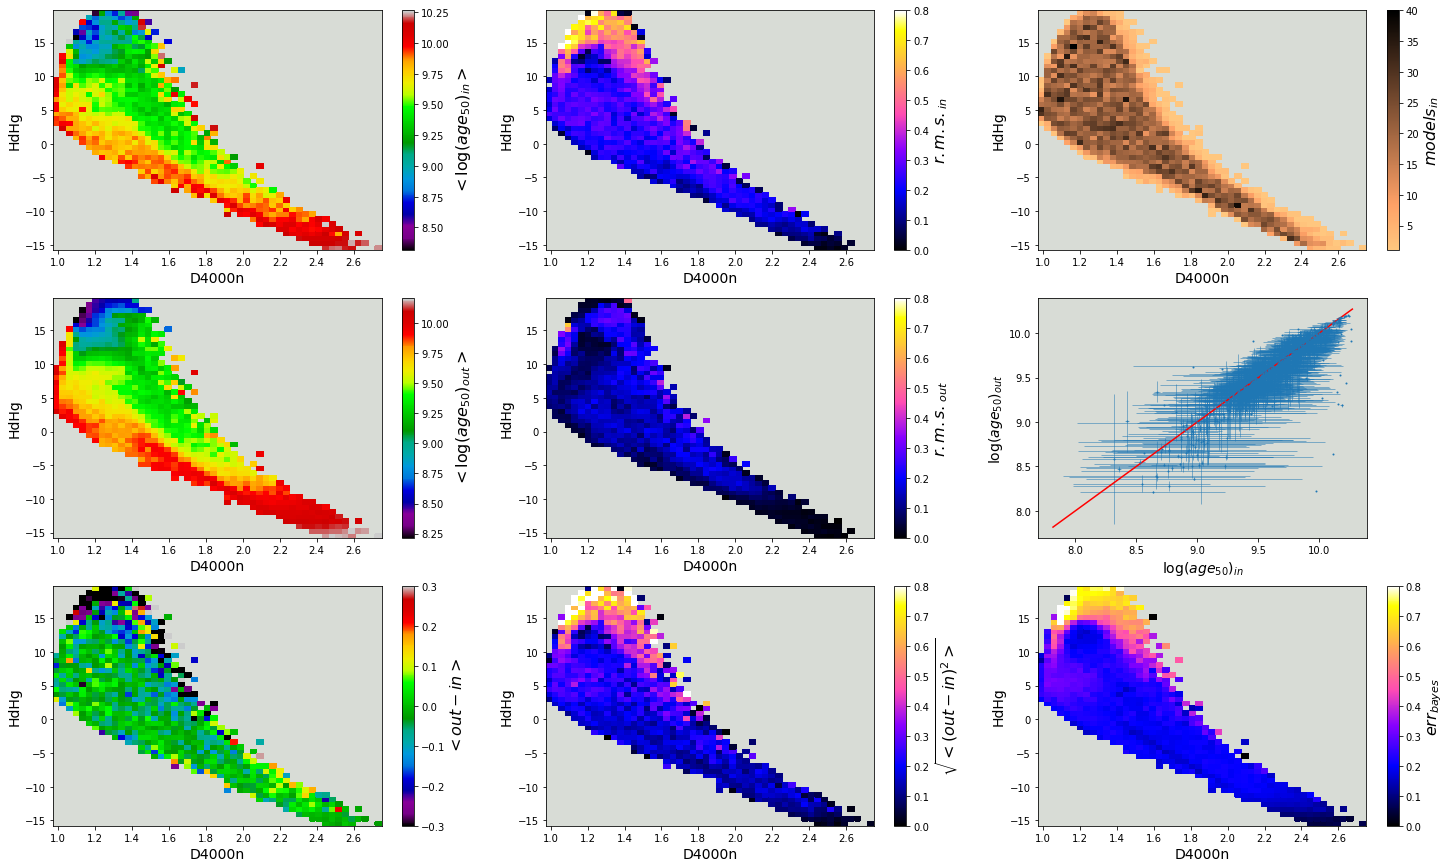

In [14]:
f_age50=f_plt.density_map_5p(D4000n, hdhg, np.log10(age50), (age50_mock), (age50_err),par_name=r'$\log(age_{50})$', x_label='D4000n', y_label='HdHg', vmin=[None,0.0, -0.3, 0.0,0.0], vmax=[None,0.8, 0.3, 0.8,0.8], figsize=(25,15), s=1)

In [15]:
#f_age50.savefig('/home/edoardo/Desktop/mock_age50_snr20.png')

In [16]:
np.shape(Aburst_arr)

(75000,)

In [17]:
sel=(A_burst<0.1)
sel_mod=[False]*n_mock

for i_mod in range (0, n_mock):
    if (np.sum(sel[i_mod, ...])==6): 
        sel_mod[i_mod]=True


In [18]:
np.sum(sel_mod)

9464

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:90: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)


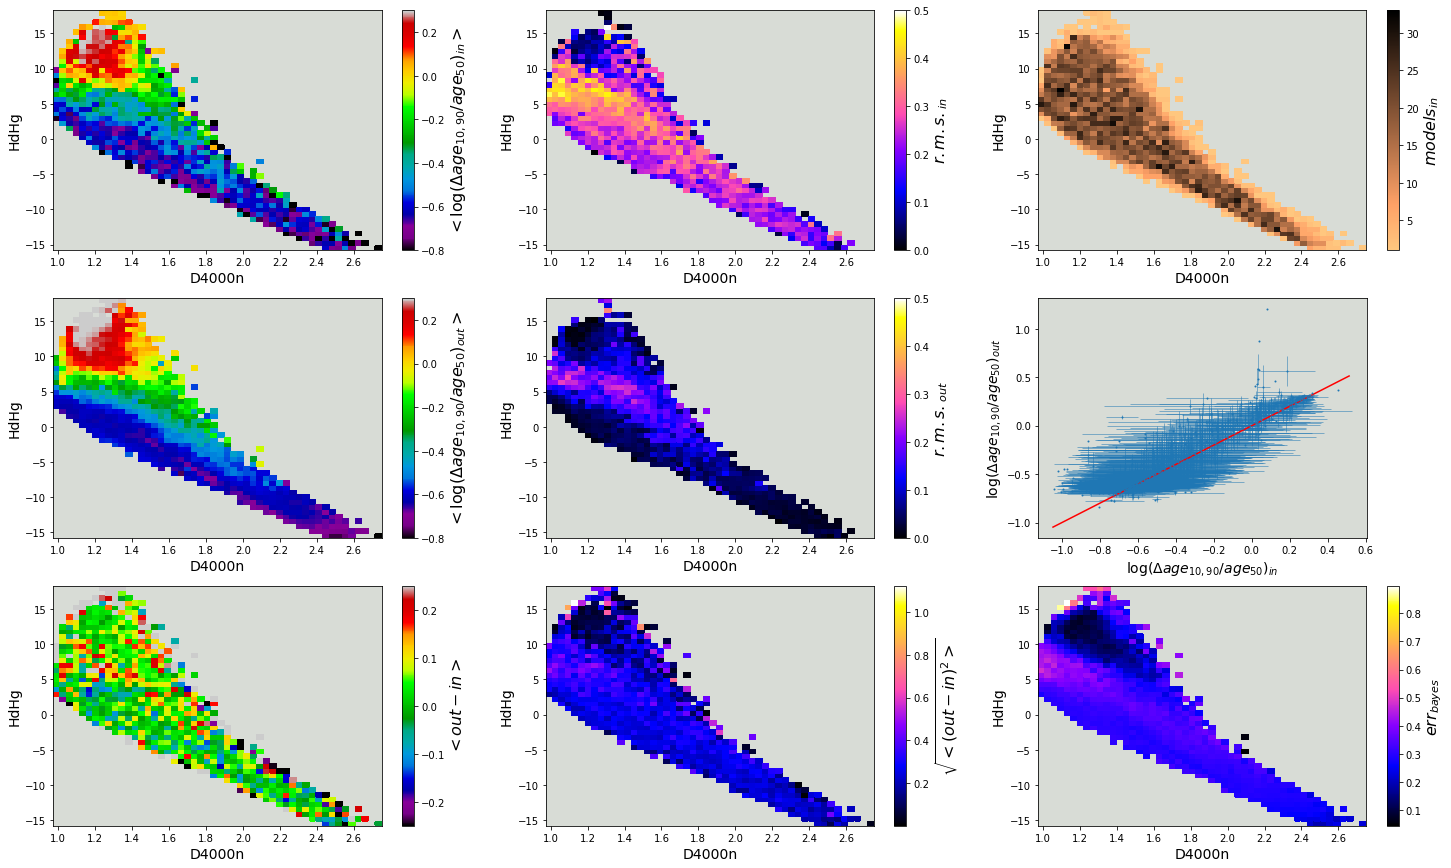

In [19]:
sel=(A_burst<0.25)
sel_mod=[False]*n_mock

for i_mod in range (0, n_mock):
    if (np.sum(sel[i_mod, ...])==6): 
        sel_mod[i_mod]=True

D4000n_sel=D4000n[sel_mod]
hdhg_sel=hdhg[sel_mod]
dage1090n50_sel=dage1090n50[sel_mod]
dage1090n50_mock_sel=dage1090n50_mock[sel_mod]
dage1090n50_err_sel=dage1090n50_err[sel_mod]
f_1090n50_sel_sb=f_plt.density_map_5p(D4000n_sel, hdhg_sel, np.log10(dage1090n50_sel), np.log10(dage1090n50_mock_sel), (dage1090n50_err_sel),par_name=r'$\log(\Delta age_{10,90}/age_{50})$', x_label='D4000n', y_label='HdHg', vmin=[-0.8,0.0, -0.25, None,None], vmax=[0.3,0.5, 0.25, None,None], figsize=(25,15), s=1)

In [20]:
#f_1090n50_sel_sb.savefig('/home/edoardo/Desktop/mock_d1090n50_new_sb.png')

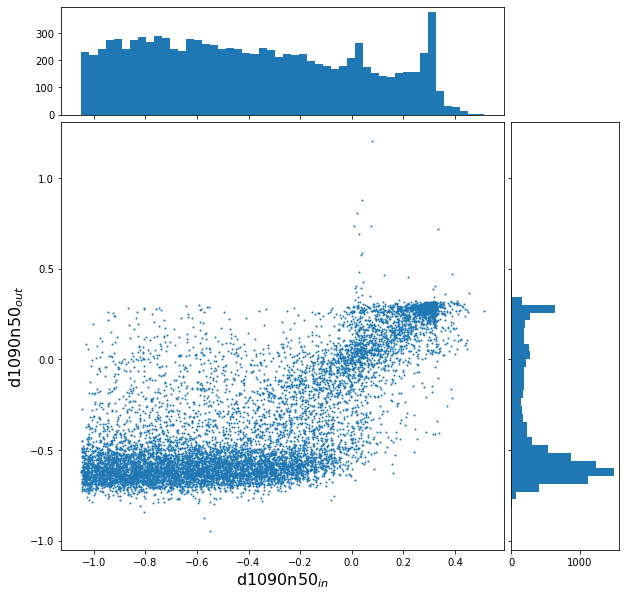

In [21]:
scat_hist_d1090n50_sel=f_plt.scatter_hist(np.log10(dage1090n50_sel), np.log10(dage1090n50_mock_sel), name_par='d1090n50')

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:90: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


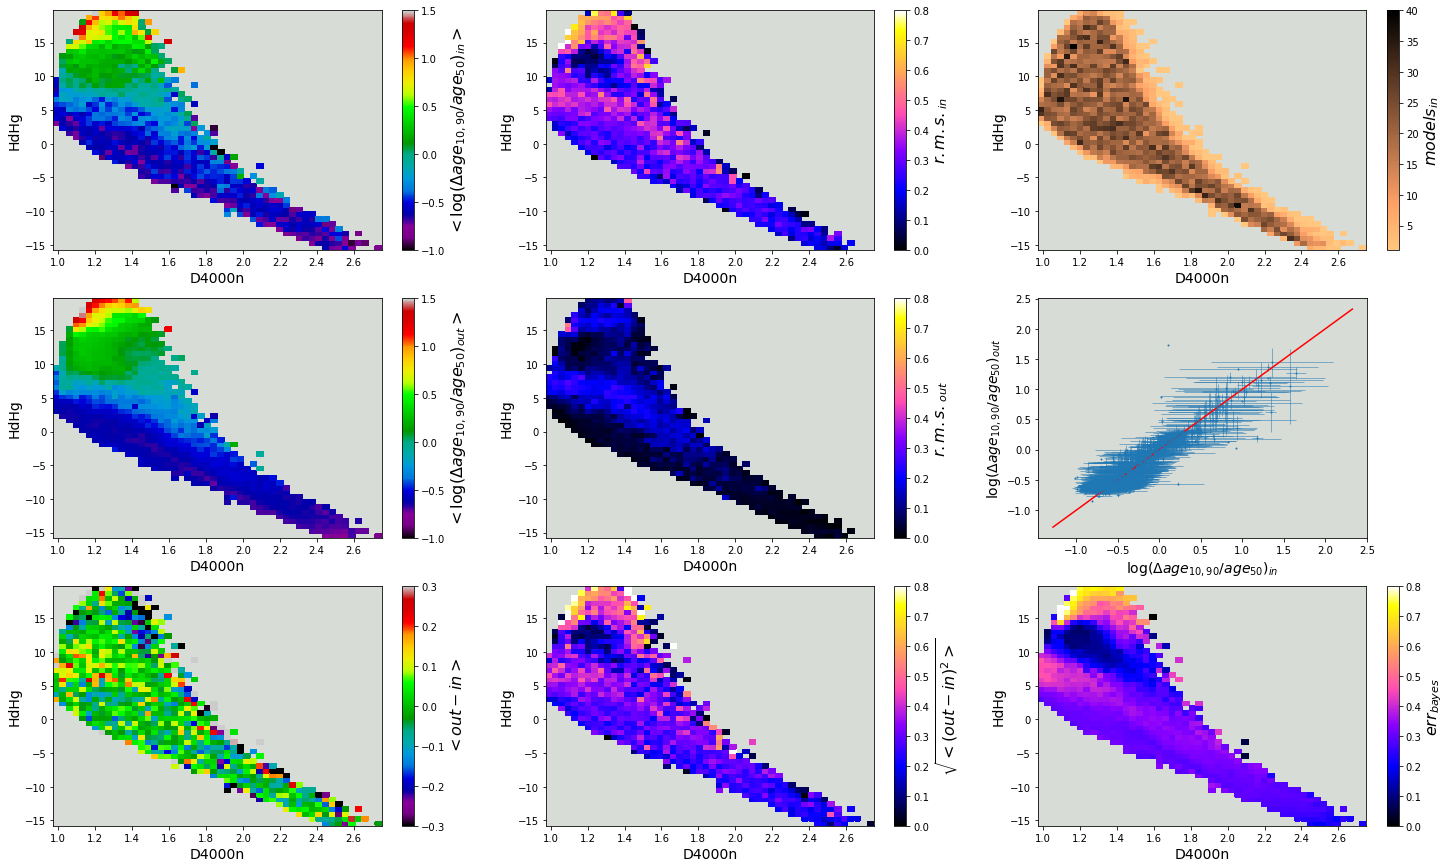

In [22]:
f_1090n50=f_plt.density_map_5p(D4000n, hdhg, np.log10(dage1090n50), np.log10(dage1090n50_mock), (dage1090n50_err),par_name=r'$\log(\Delta age_{10,90}/age_{50})$', x_label='D4000n', y_label='HdHg', vmin=[-1.0,0.0, -0.3, 0.0,0.0], vmax=[1.5,0.8, 0.3, 0.8,0.8], figsize=(25,15), s=1)

In [23]:
#f_1090n50.savefig('/home/edoardo/Desktop/mock_d1090n50_new_snr100.png')

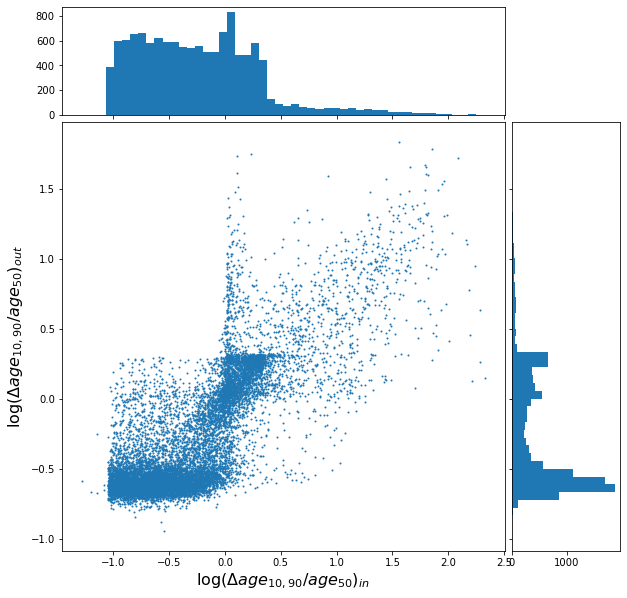

In [24]:
scat_hist_d1090n50=f_plt.scatter_hist(np.log10(dage1090n50), np.log10(dage1090n50_mock), name_par=r'$\log(\Delta age_{10,90}/age_{50})$')

In [25]:
#scat_hist_d1090n50.savefig('/home/edoardo/Desktop/scat_hist_d1090n50_new_snr100.png')

<ipython-input-26-c0d24c91b2c6>:1: RuntimeWarning: divide by zero encountered in log10
  f_1050n50=f_plt.density_map_5p(D4000n, hdhg, np.log10(dage1050n50), np.log10(dage1050n50_mock), (dage1050n50_err),par_name='dage1050n50', x_label='D4000n', y_label='HdHg', vmin=[None,-0.5, 0.0, None,None], vmax=[None,0.5, 2, None,None], figsize=(25,15), s=1)


total deleted (no finite values): 19


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:90: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


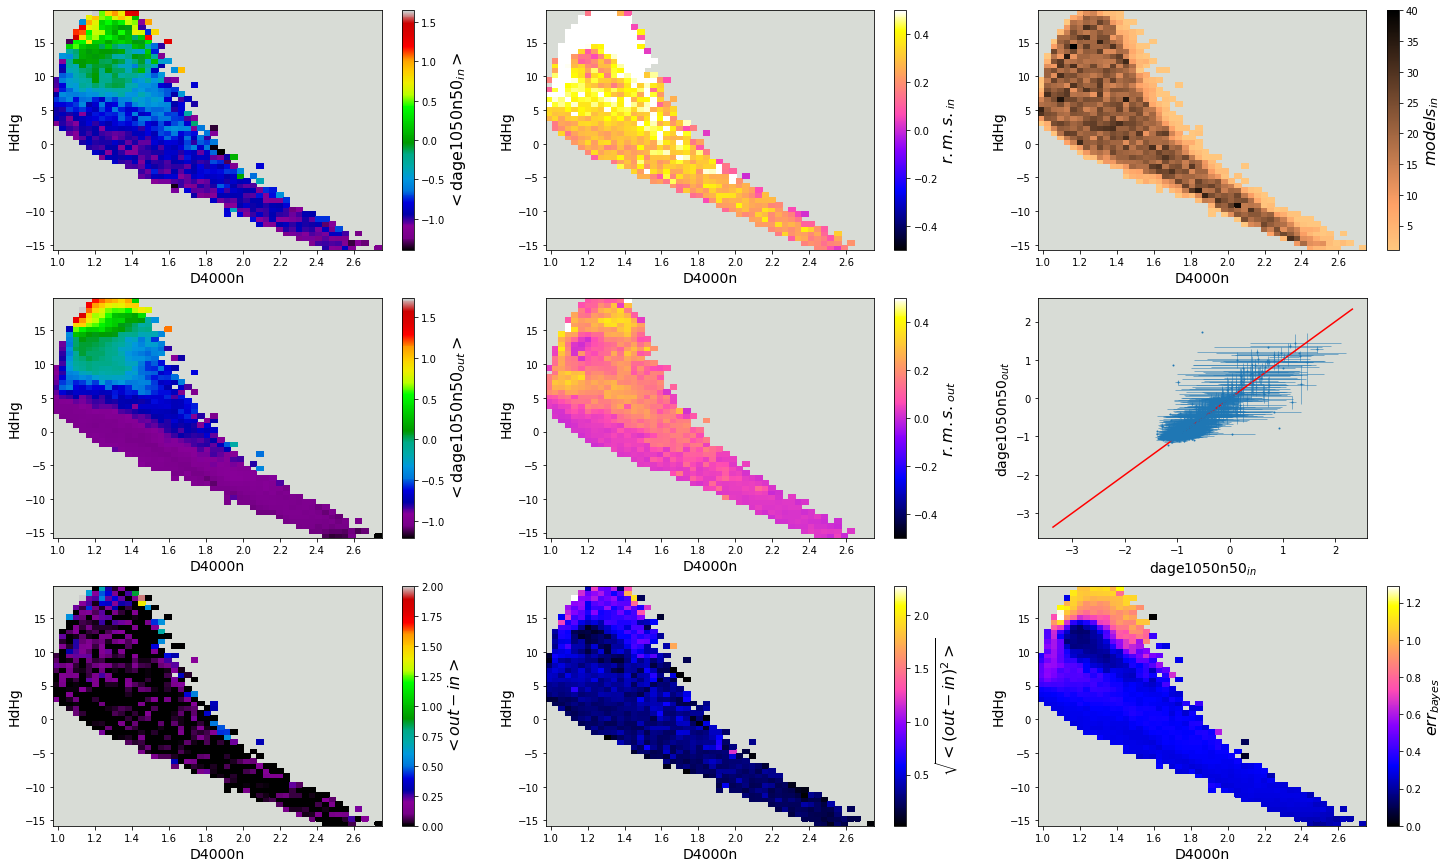

In [26]:
f_1050n50=f_plt.density_map_5p(D4000n, hdhg, np.log10(dage1050n50), np.log10(dage1050n50_mock), (dage1050n50_err),par_name='dage1050n50', x_label='D4000n', y_label='HdHg', vmin=[None,-0.5, 0.0, None,None], vmax=[None,0.5, 2, None,None], figsize=(25,15), s=1)

<ipython-input-27-060caa3adb49>:1: RuntimeWarning: divide by zero encountered in log10
  f_5090n50=f_plt.density_map_5p(D4000n, hdhg, np.log10(dage5090n50), np.log10(dage5090n50_mock), (dage5090n50_err),par_name='dage5090n50', x_label='D4000n', y_label='HdHg', vmin=[None,-0.5, 0.0, None,None], vmax=[None,0.5, 2, None,None], figsize=(25,15), s=1)


total deleted (no finite values): 1015


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:90: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)


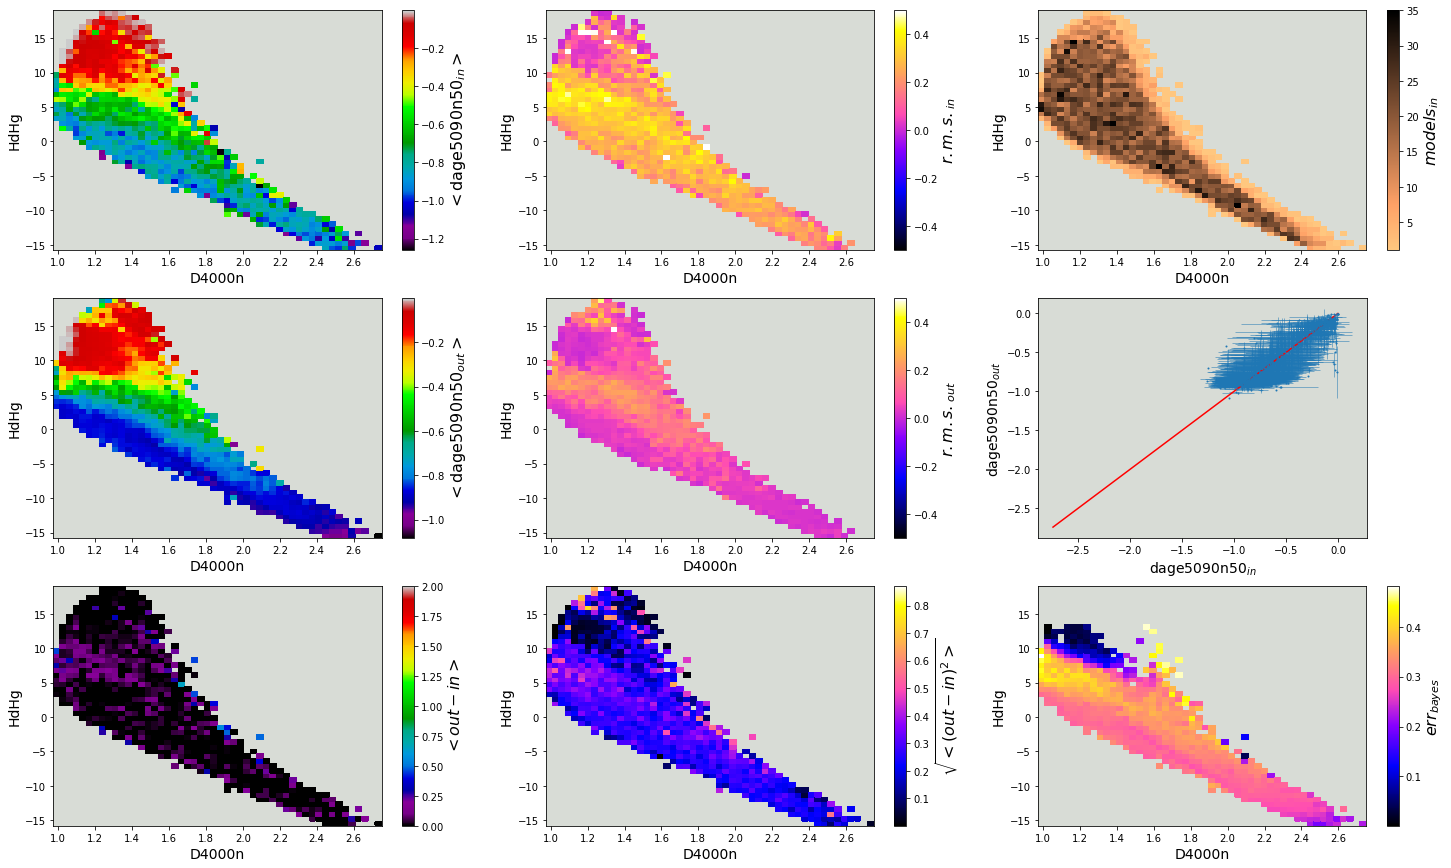

In [27]:
f_5090n50=f_plt.density_map_5p(D4000n, hdhg, np.log10(dage5090n50), np.log10(dage5090n50_mock), (dage5090n50_err),par_name='dage5090n50', x_label='D4000n', y_label='HdHg', vmin=[None,-0.5, 0.0, None,None], vmax=[None,0.5, 2, None,None], figsize=(25,15), s=1)

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:90: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)
/home/edoardo/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


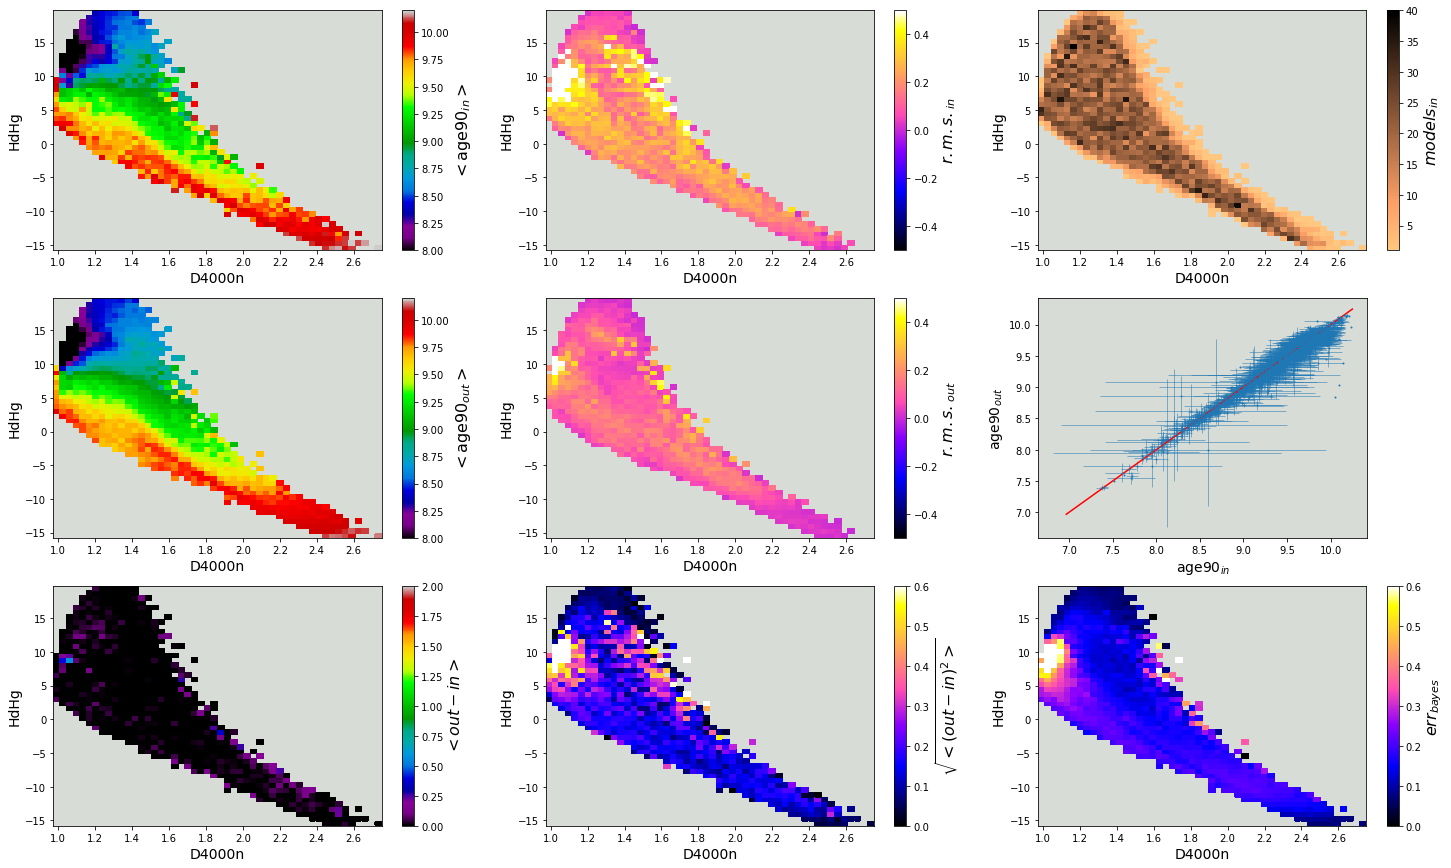

In [28]:
f_90=f_plt.density_map_5p(D4000n, hdhg, np.log10(age90), age90_mock, age90_err,par_name='age90', x_label='D4000n', y_label='HdHg', vmin=[8.0, -0.5, 0.0, 0.0,0.0], vmax=[10.2, 0.5, 2.0,0.6,0.6], figsize=(25,15), s=1)

total deleted (no finite values): 0


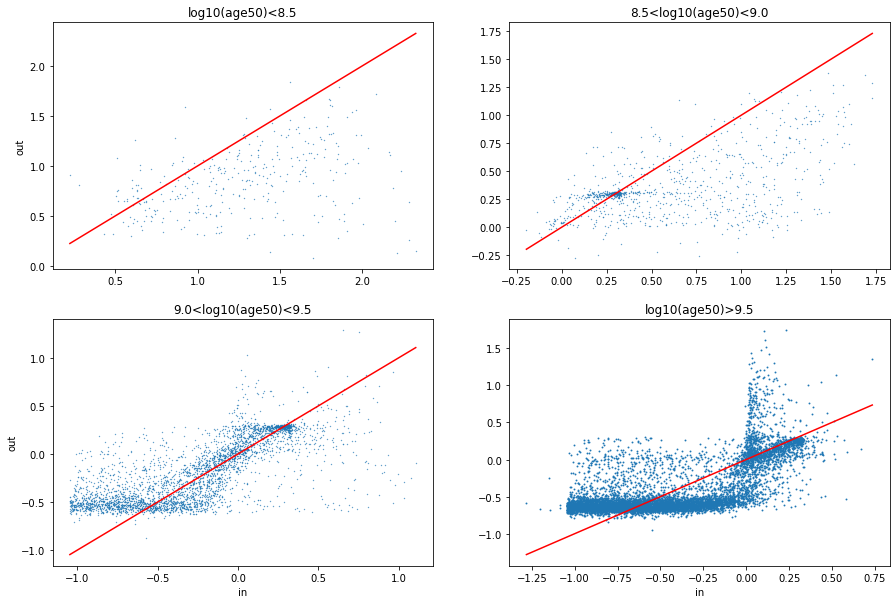

In [29]:
f_scatter=f_plt.scatter_comp(np.log10(age50), np.log10(dage1090n50),np.log10(dage1090n50_mock), limits=[8.5,9.0,9.5], name_binned_par='log10(age50)' )

total deleted (no finite values): 0


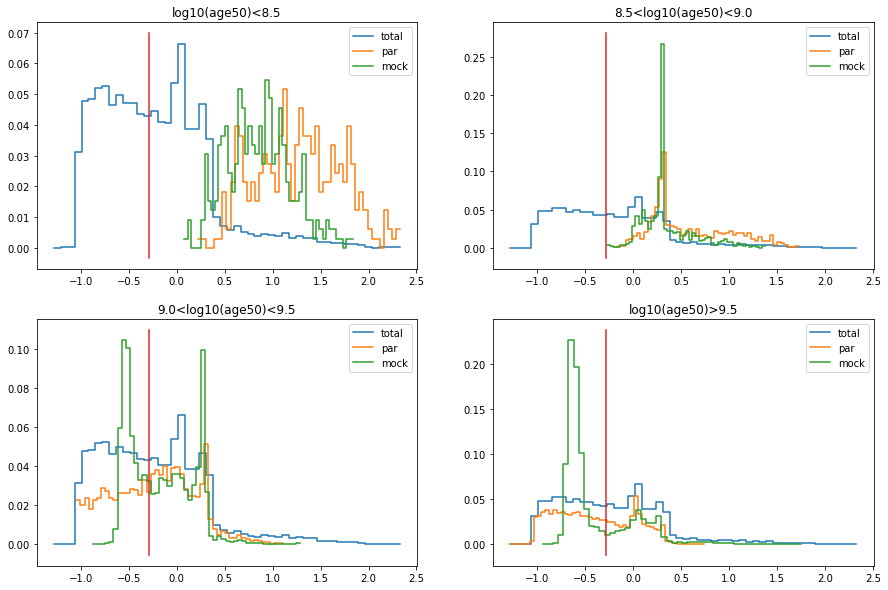

In [30]:
f_prior=f_plt.prior_comp(np.log10(age50), np.log10(age10-age90)-np.log10(age50),np.log10(dage1090n50_mock), limits=[8.5,9.0,9.5], name_binned_par='log10(age50)' )

total deleted (no finite values): 0


/home/edoardo/Desktop/TESIedo_git/tesi_py/function_plot.py:90: RuntimeWarning: divide by zero encountered in true_divide
  err_norm=stats.binned_statistic_2d(x_fin,y_fin,(mock_par-par)/(mock_err), bins=50, statistic=function_plot.rms_1684)


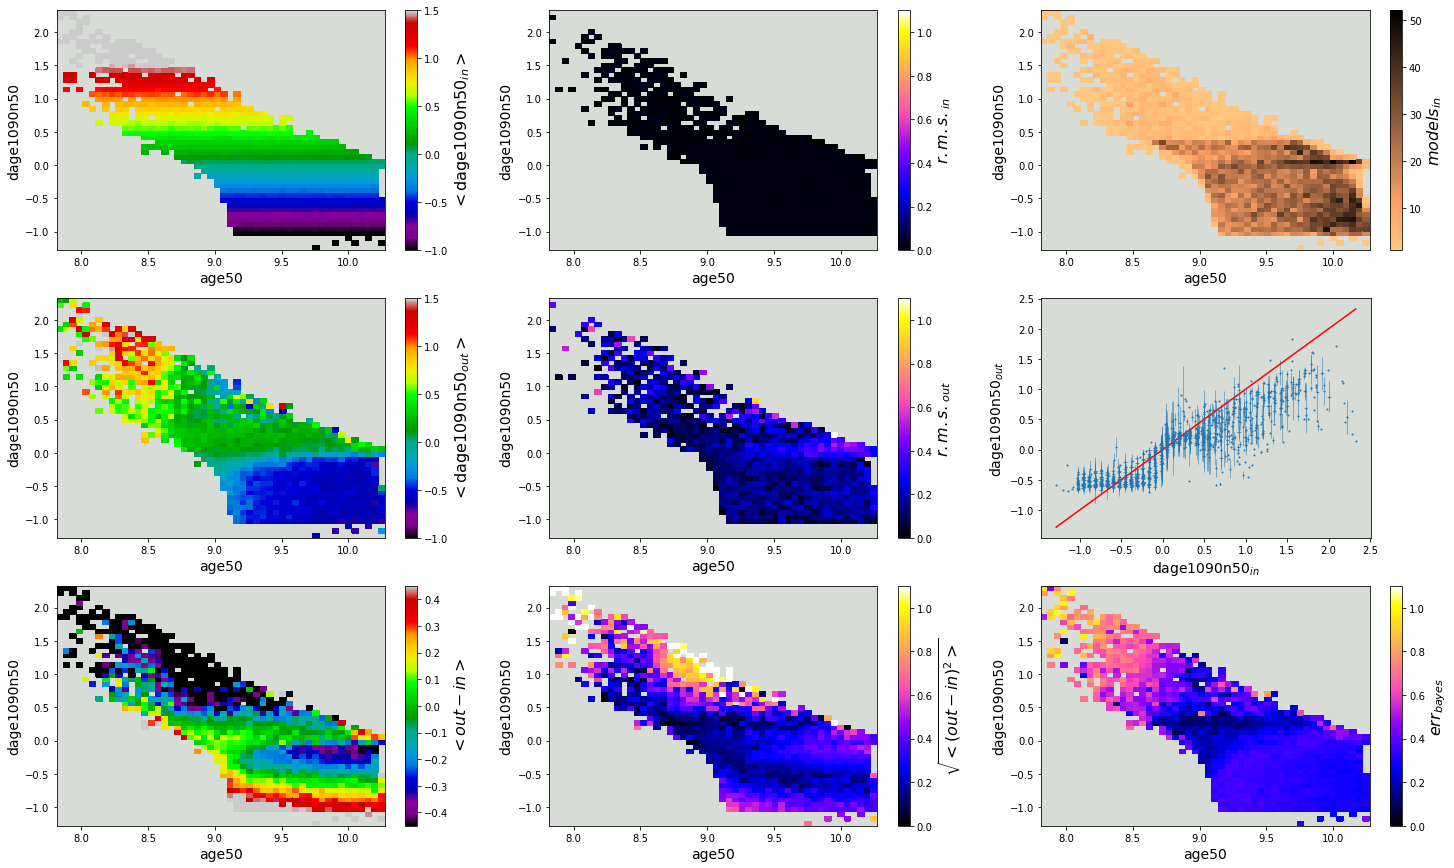

In [31]:
f_1090n50_physpar=f_plt.density_map_5p(np.log10(age50), np.log10(dage1090n50), np.log10(dage1090n50), np.log10(dage1090n50_mock), (dage1090n50_err),par_name='dage1090n50', x_label='age50', y_label='dage1090n50', vmin=[-1.0,0.0, -0.45, 0.0,0.0], vmax=[1.5,1.1, 0.45, 1.1,1.1], figsize=(25,15), s=1)

In [32]:
#f_1090n50_physpar.savefig('/home/edoardo/Desktop/mock_d1090n50_new_physpar.png')